In [437]:

from datetime import date
from datetime import datetime
import time
import pandas as pd
import numpy as np

def toDate(epoch_time):
    return datetime.fromtimestamp(epoch_time)

def calculate_heat_index(temperature, relative_humidity):
    heat_index = int((-8.784695 +
                  1.61139411 * temperature +
                  (2.338549 * relative_humidity) +
                  (-0.14611605 * temperature * relative_humidity) +
                  (-0.01230809 * (temperature ** 2)) +
                  (-0.01642482 * (relative_humidity ** 2)) +
                  (0.00221173 * (temperature ** 2) * relative_humidity) +
                  (0.00072546 * temperature * (relative_humidity ** 2)) +
                  (-0.000003582 * (temperature ** 2) * (relative_humidity ** 2))))
    return heat_index

In [438]:
import pandas as pd

df=pd.read_json('/Users/walkerrowe/Documents/hypatia/paphosWeatherFiveYearsThroughJuly.json')

df['dt'].map(toDate)

0       2013-07-31 03:00:00
1       2013-07-31 04:00:00
2       2013-07-31 05:00:00
3       2013-07-31 06:00:00
4       2013-07-31 07:00:00
                ...        
87667   2023-07-31 22:00:00
87668   2023-07-31 23:00:00
87669   2023-08-01 00:00:00
87670   2023-08-01 01:00:00
87671   2023-08-01 02:00:00
Name: dt, Length: 87672, dtype: datetime64[ns]

In [439]:
df['month']=df['dt'].map(lambda l: toDate(l).strftime("%m"))
df['day']=df['dt'].map(lambda l: toDate(l).strftime("%d"))
df['year']=df['dt'].map(lambda l: toDate(l).strftime("%y"))
df['hour']=df['dt'].map(lambda l: toDate(l).strftime("%H"))
 
df['temp']=df["main"].map(lambda x: int(x["temp"]))
df['temp_min']=df["main"].map(lambda x: int(x["temp_min"]) )
df['temp_max']=df["main"].map(lambda x: int(x["temp_max"]) )
df['humidity']=df["main"].map(lambda x: int(x["humidity"]))

df['heatIndex'] = df.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)
#df.set_index("dt_iso",inplace=True)

target=df[['year','month','day', 'hour' ,'temp','temp_min','temp_max', 'humidity', 'heatIndex']]

target['days over 31']=target['temp_max'].map(lambda l : 1 if l > 31 else 0)
 

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_77891/1587566322.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['days over 31']=target['temp_max'].map(lambda l : 1 if l > 31 else 0)


In [440]:
july=target.loc[(target['month'] == '07') & (target['year'] != '13') & (target['hour']=='15')]


In [441]:
july.set_index(['year','day'],inplace=True)
 

In [442]:
hot=july.loc[july['temp_max']>31]

In [443]:
hottest=hot.groupby('year').sum()

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_77891/2834321788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hottest=hot.groupby('year').sum()


In [444]:
over31=pd.DataFrame(hottest['days over 31'].sort_values())
over31

,days over 31
year,
14,1
15,1
19,3
16,6
18,9
17,15
20,21
21,21
22,28


Text(0.5, 1.0, 'Days over 31 Degrees')

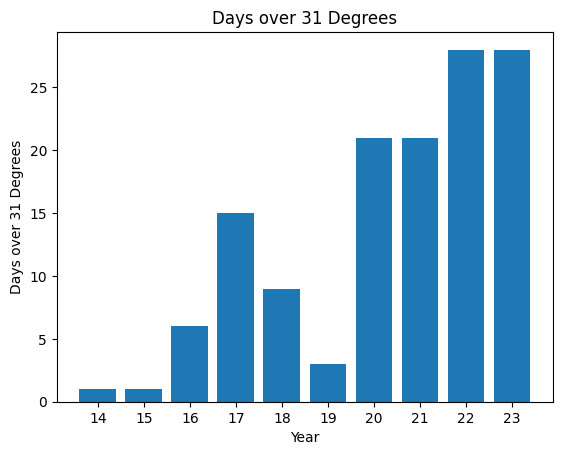

In [445]:
import matplotlib.pyplot as plt

plt.bar(hottest['days over 31'].index, hottest['days over 31'].values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Days over 31 Degrees')
plt.title('Days over 31 Degrees')

In [446]:
hot.loc['16']

,month,hour,temp,temp_min,temp_max,humidity,heatIndex,days over 31
day,,,,,,,,
06,07,15,30,27,33,67,34,1
11,07,15,29,27,32,75,33,1
13,07,15,29,27,32,71,32,1
24,07,15,30,27,33,75,36,1
25,07,15,29,27,32,71,32,1
29,07,15,29,27,32,75,33,1


In [457]:
 july.loc['23'].sort_values(by='temp_max',ascending=False)

,month,hour,temp,temp_min,temp_max,humidity,heatIndex,days over 31
day,,,,,,,,
24,07,15,31,29,38,70,37,1
23,07,15,32,29,38,66,39,1
22,07,15,31,28,38,70,37,1
14,07,15,29,27,38,59,30,1
18,07,15,30,27,37,74,36,1
28,07,15,30,27,37,56,32,1
26,07,15,31,28,37,52,33,1
25,07,15,32,29,37,48,33,1
13,07,15,29,26,37,51,29,1
